# Noise2Void - 3D Example for ExASPIM

__Note:__ This notebook expects a trained model and will only work if you have executed the `01_training.ipynb` beforehand.

In [1]:
# We import all our dependencies.
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
from n2v.models import N2V
import zarr
import dask.array as da
from distributed import Client
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread

2024-10-23 02:03:15.190281: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-23 02:03:15.311528: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
client = Client()

## Load the Network

In [3]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.
model_name = 'n2v_3D'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

2024-10-23 02:03:19.638626: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-23 02:03:19.678906: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-23 02:03:19.681843: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-23 02:03:19.685253: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

Loading network weights from 'weights_best.h5'.


In [4]:
# In case you do not want to load the weights that lead to lowest validation loss during 
# training but the latest computed weights, you can execute the following line:

# model.load_weights('weights_last.h5')

## Prediction
Here we will simply use the same data as during training and denoise it using our network.

In [5]:
# We load the data we want to process.
impath = "/data/exaSPIM_706301_training_blocks/block_001/block_001.zarr/0"
img = da.from_zarr(impath).squeeze().compute()
print(img.shape)

(1024, 1024, 1024)


In [6]:
# Here we process the data.
# The 'n_tiles' parameter can be used if images are too big for the GPU memory.
# If we do not provide the 'n_tiles' parameter the system will automatically try to find an appropriate tiling.
pred = model.predict(img, axes='ZYX', n_tiles=(4,4,8))

The input image is of type uint16 and will be casted to float32 for prediction.


2024-10-23 02:03:44.993906: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8801


1/1 [==============================] - 19s 19s/step


  1%|          | 1/128 [00:00<00:00, 107546.26it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 2/128 [00:02<02:22,  1.13s/it]    

1/1 [==============================] - 0s 78ms/step


  2%|▏         | 3/128 [00:04<03:17,  1.58s/it]

1/1 [==============================] - 0s 84ms/step


  3%|▎         | 4/128 [00:06<03:44,  1.81s/it]

1/1 [==============================] - 0s 79ms/step


  4%|▍         | 5/128 [00:08<03:59,  1.95s/it]

1/1 [==============================] - 0s 79ms/step


  5%|▍         | 6/128 [00:11<04:08,  2.03s/it]

1/1 [==============================] - 0s 86ms/step


  5%|▌         | 7/128 [00:13<04:13,  2.09s/it]

1/1 [==============================] - 0s 86ms/step


  6%|▋         | 8/128 [00:15<04:15,  2.13s/it]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 9/128 [00:17<04:25,  2.23s/it]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 10/128 [00:20<04:22,  2.23s/it]

1/1 [==============================] - 0s 49ms/step


  9%|▊         | 11/128 [00:22<04:18,  2.21s/it]

1/1 [==============================] - 0s 50ms/step


  9%|▉         | 12/128 [00:24<04:14,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 10%|█         | 13/128 [00:26<04:11,  2.19s/it]

1/1 [==============================] - 0s 50ms/step


 11%|█         | 14/128 [00:28<04:08,  2.18s/it]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 15/128 [00:31<04:06,  2.18s/it]

1/1 [==============================] - 0s 76ms/step


 12%|█▎        | 16/128 [00:33<04:04,  2.18s/it]

1/1 [==============================] - 0s 51ms/step


 13%|█▎        | 17/128 [00:35<04:04,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 14%|█▍        | 18/128 [00:37<04:02,  2.21s/it]

1/1 [==============================] - 0s 50ms/step


 15%|█▍        | 19/128 [00:39<03:59,  2.20s/it]

1/1 [==============================] - 0s 49ms/step


 16%|█▌        | 20/128 [00:42<03:56,  2.19s/it]

1/1 [==============================] - 0s 50ms/step


 16%|█▋        | 21/128 [00:44<03:53,  2.19s/it]

1/1 [==============================] - 0s 51ms/step


 17%|█▋        | 22/128 [00:46<03:51,  2.18s/it]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 23/128 [00:48<03:48,  2.18s/it]

1/1 [==============================] - 0s 51ms/step


 19%|█▉        | 24/128 [00:50<03:47,  2.19s/it]

1/1 [==============================] - 0s 50ms/step


 20%|█▉        | 25/128 [00:52<03:46,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 20%|██        | 26/128 [00:55<03:45,  2.21s/it]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 27/128 [00:57<03:42,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 22%|██▏       | 28/128 [00:59<03:39,  2.19s/it]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 29/128 [01:01<03:36,  2.19s/it]

1/1 [==============================] - 0s 50ms/step


 23%|██▎       | 30/128 [01:03<03:34,  2.18s/it]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 31/128 [01:06<03:31,  2.18s/it]

1/1 [==============================] - 0s 51ms/step


 25%|██▌       | 32/128 [01:08<03:29,  2.19s/it]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 33/128 [01:10<03:40,  2.32s/it]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 34/128 [01:13<03:35,  2.30s/it]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 35/128 [01:15<03:30,  2.26s/it]

1/1 [==============================] - 0s 49ms/step


 28%|██▊       | 36/128 [01:17<03:26,  2.24s/it]

1/1 [==============================] - 0s 50ms/step


 29%|██▉       | 37/128 [01:19<03:22,  2.22s/it]

1/1 [==============================] - 0s 51ms/step


 30%|██▉       | 38/128 [01:21<03:19,  2.21s/it]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 39/128 [01:24<03:16,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 31%|███▏      | 40/128 [01:26<03:13,  2.19s/it]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 41/128 [01:28<03:17,  2.27s/it]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 42/128 [01:30<03:14,  2.26s/it]

1/1 [==============================] - 0s 50ms/step


 34%|███▎      | 43/128 [01:33<03:09,  2.23s/it]

1/1 [==============================] - 0s 76ms/step


 34%|███▍      | 44/128 [01:35<03:06,  2.22s/it]

1/1 [==============================] - 0s 83ms/step


 35%|███▌      | 45/128 [01:37<03:04,  2.22s/it]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 46/128 [01:39<03:01,  2.21s/it]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 47/128 [01:41<02:58,  2.20s/it]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 48/128 [01:44<02:56,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 49/128 [01:46<02:54,  2.21s/it]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 50/128 [01:48<02:53,  2.22s/it]

1/1 [==============================] - 0s 50ms/step


 40%|███▉      | 51/128 [01:50<02:50,  2.21s/it]

1/1 [==============================] - 0s 50ms/step


 41%|████      | 52/128 [01:52<02:47,  2.20s/it]

1/1 [==============================] - 0s 52ms/step


 41%|████▏     | 53/128 [01:55<02:44,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 42%|████▏     | 54/128 [01:57<02:42,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 43%|████▎     | 55/128 [01:59<02:40,  2.19s/it]

1/1 [==============================] - 0s 51ms/step


 44%|████▍     | 56/128 [02:01<02:37,  2.19s/it]

1/1 [==============================] - 0s 50ms/step


 45%|████▍     | 57/128 [02:03<02:36,  2.21s/it]

1/1 [==============================] - 0s 51ms/step


 45%|████▌     | 58/128 [02:06<02:35,  2.22s/it]

1/1 [==============================] - 0s 79ms/step


 46%|████▌     | 59/128 [02:08<02:33,  2.22s/it]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 60/128 [02:10<02:30,  2.21s/it]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 61/128 [02:12<02:27,  2.21s/it]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 62/128 [02:15<02:25,  2.20s/it]

1/1 [==============================] - 0s 51ms/step


 49%|████▉     | 63/128 [02:17<02:23,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 50%|█████     | 64/128 [02:19<02:20,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 65/128 [02:21<02:25,  2.32s/it]

1/1 [==============================] - 0s 78ms/step


 52%|█████▏    | 66/128 [02:24<02:22,  2.30s/it]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 67/128 [02:26<02:18,  2.27s/it]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 68/128 [02:28<02:14,  2.24s/it]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 69/128 [02:30<02:11,  2.23s/it]

1/1 [==============================] - 0s 49ms/step


 55%|█████▍    | 70/128 [02:33<02:08,  2.22s/it]

1/1 [==============================] - 0s 50ms/step


 55%|█████▌    | 71/128 [02:35<02:05,  2.21s/it]

1/1 [==============================] - 0s 49ms/step


 56%|█████▋    | 72/128 [02:37<02:03,  2.20s/it]

1/1 [==============================] - 0s 79ms/step


 57%|█████▋    | 73/128 [02:39<02:05,  2.29s/it]

1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 74/128 [02:42<02:02,  2.27s/it]

1/1 [==============================] - 0s 51ms/step


 59%|█████▊    | 75/128 [02:44<01:59,  2.25s/it]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 76/128 [02:46<01:56,  2.23s/it]

1/1 [==============================] - 0s 80ms/step


 60%|██████    | 77/128 [02:48<01:53,  2.23s/it]

1/1 [==============================] - 0s 80ms/step


 61%|██████    | 78/128 [02:50<01:51,  2.22s/it]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 79/128 [02:53<01:48,  2.21s/it]

1/1 [==============================] - 0s 50ms/step


 62%|██████▎   | 80/128 [02:55<01:45,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 81/128 [02:57<01:44,  2.22s/it]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 82/128 [02:59<01:42,  2.23s/it]

1/1 [==============================] - 0s 51ms/step


 65%|██████▍   | 83/128 [03:01<01:39,  2.21s/it]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 84/128 [03:04<01:37,  2.21s/it]

1/1 [==============================] - 0s 51ms/step


 66%|██████▋   | 85/128 [03:06<01:34,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 86/128 [03:08<01:32,  2.20s/it]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 87/128 [03:10<01:29,  2.19s/it]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 88/128 [03:12<01:27,  2.19s/it]

1/1 [==============================] - 0s 97ms/step


 70%|██████▉   | 89/128 [03:15<01:26,  2.22s/it]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 90/128 [03:17<01:24,  2.23s/it]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 91/128 [03:19<01:22,  2.22s/it]

1/1 [==============================] - 0s 51ms/step


 72%|███████▏  | 92/128 [03:21<01:19,  2.21s/it]

1/1 [==============================] - 0s 50ms/step


 73%|███████▎  | 93/128 [03:24<01:17,  2.20s/it]

1/1 [==============================] - 0s 49ms/step


 73%|███████▎  | 94/128 [03:26<01:14,  2.20s/it]

1/1 [==============================] - 0s 51ms/step


 74%|███████▍  | 95/128 [03:28<01:12,  2.20s/it]

1/1 [==============================] - 0s 51ms/step


 75%|███████▌  | 96/128 [03:30<01:10,  2.19s/it]

1/1 [==============================] - 0s 50ms/step


 76%|███████▌  | 97/128 [03:33<01:11,  2.32s/it]

1/1 [==============================] - 0s 52ms/step


 77%|███████▋  | 98/128 [03:35<01:08,  2.29s/it]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 99/128 [03:37<01:05,  2.26s/it]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 100/128 [03:39<01:02,  2.24s/it]

1/1 [==============================] - 0s 50ms/step


 79%|███████▉  | 101/128 [03:42<01:00,  2.22s/it]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 102/128 [03:44<00:57,  2.21s/it]

1/1 [==============================] - 0s 78ms/step


 80%|████████  | 103/128 [03:46<00:55,  2.21s/it]

1/1 [==============================] - 0s 79ms/step


 81%|████████▏ | 104/128 [03:48<00:53,  2.22s/it]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 105/128 [03:51<00:52,  2.29s/it]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 106/128 [03:53<00:50,  2.27s/it]

1/1 [==============================] - 0s 49ms/step


 84%|████████▎ | 107/128 [03:55<00:47,  2.25s/it]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 108/128 [03:57<00:44,  2.23s/it]

1/1 [==============================] - 0s 50ms/step


 85%|████████▌ | 109/128 [03:59<00:42,  2.22s/it]

1/1 [==============================] - 0s 49ms/step


 86%|████████▌ | 110/128 [04:02<00:39,  2.21s/it]

1/1 [==============================] - 0s 50ms/step


 87%|████████▋ | 111/128 [04:04<00:37,  2.20s/it]

1/1 [==============================] - 0s 79ms/step


 88%|████████▊ | 112/128 [04:06<00:35,  2.21s/it]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 113/128 [04:08<00:33,  2.22s/it]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 114/128 [04:11<00:31,  2.23s/it]

1/1 [==============================] - 0s 51ms/step


 90%|████████▉ | 115/128 [04:13<00:28,  2.22s/it]

1/1 [==============================] - 0s 50ms/step


 91%|█████████ | 116/128 [04:15<00:26,  2.21s/it]

1/1 [==============================] - 0s 49ms/step


 91%|█████████▏| 117/128 [04:17<00:24,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 118/128 [04:19<00:21,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 93%|█████████▎| 119/128 [04:21<00:19,  2.19s/it]

1/1 [==============================] - 0s 79ms/step


 94%|█████████▍| 120/128 [04:24<00:17,  2.20s/it]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▍| 121/128 [04:26<00:15,  2.22s/it]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▌| 122/128 [04:28<00:13,  2.23s/it]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 123/128 [04:30<00:11,  2.21s/it]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 124/128 [04:33<00:08,  2.20s/it]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 125/128 [04:35<00:06,  2.20s/it]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 126/128 [04:37<00:04,  2.20s/it]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 127/128 [04:39<00:02,  2.20s/it]

1/1 [==============================] - 0s 78ms/step


100%|██████████| 128/128 [04:42<00:00,  2.21s/it]


In [7]:
from numcodecs import blosc
from skimage.exposure import rescale_intensity

codec = blosc.Blosc(cname="zstd", clevel=5, shuffle=blosc.Blosc.SHUFFLE)

print(img.dtype)
in_zarr = zarr.array(img, compressor=codec, chunks=(256, 256, 256))
print(in_zarr.nbytes / in_zarr.nbytes_stored)

img_min, img_max = img.min(), img.max()
print(img_min, img_max)

rescaled = rescale_intensity(pred, in_range="image", out_range=(img_min, img_max)).astype(np.uint16)

out_zarr_denoised = zarr.array(rescaled, compressor=codec, chunks=(256, 256, 256))
print(out_zarr_denoised.nbytes / out_zarr_denoised.nbytes_stored)
print(out_zarr_denoised.dtype)


uint16
3.073113501606957
0 586
6.354626930535196
uint16


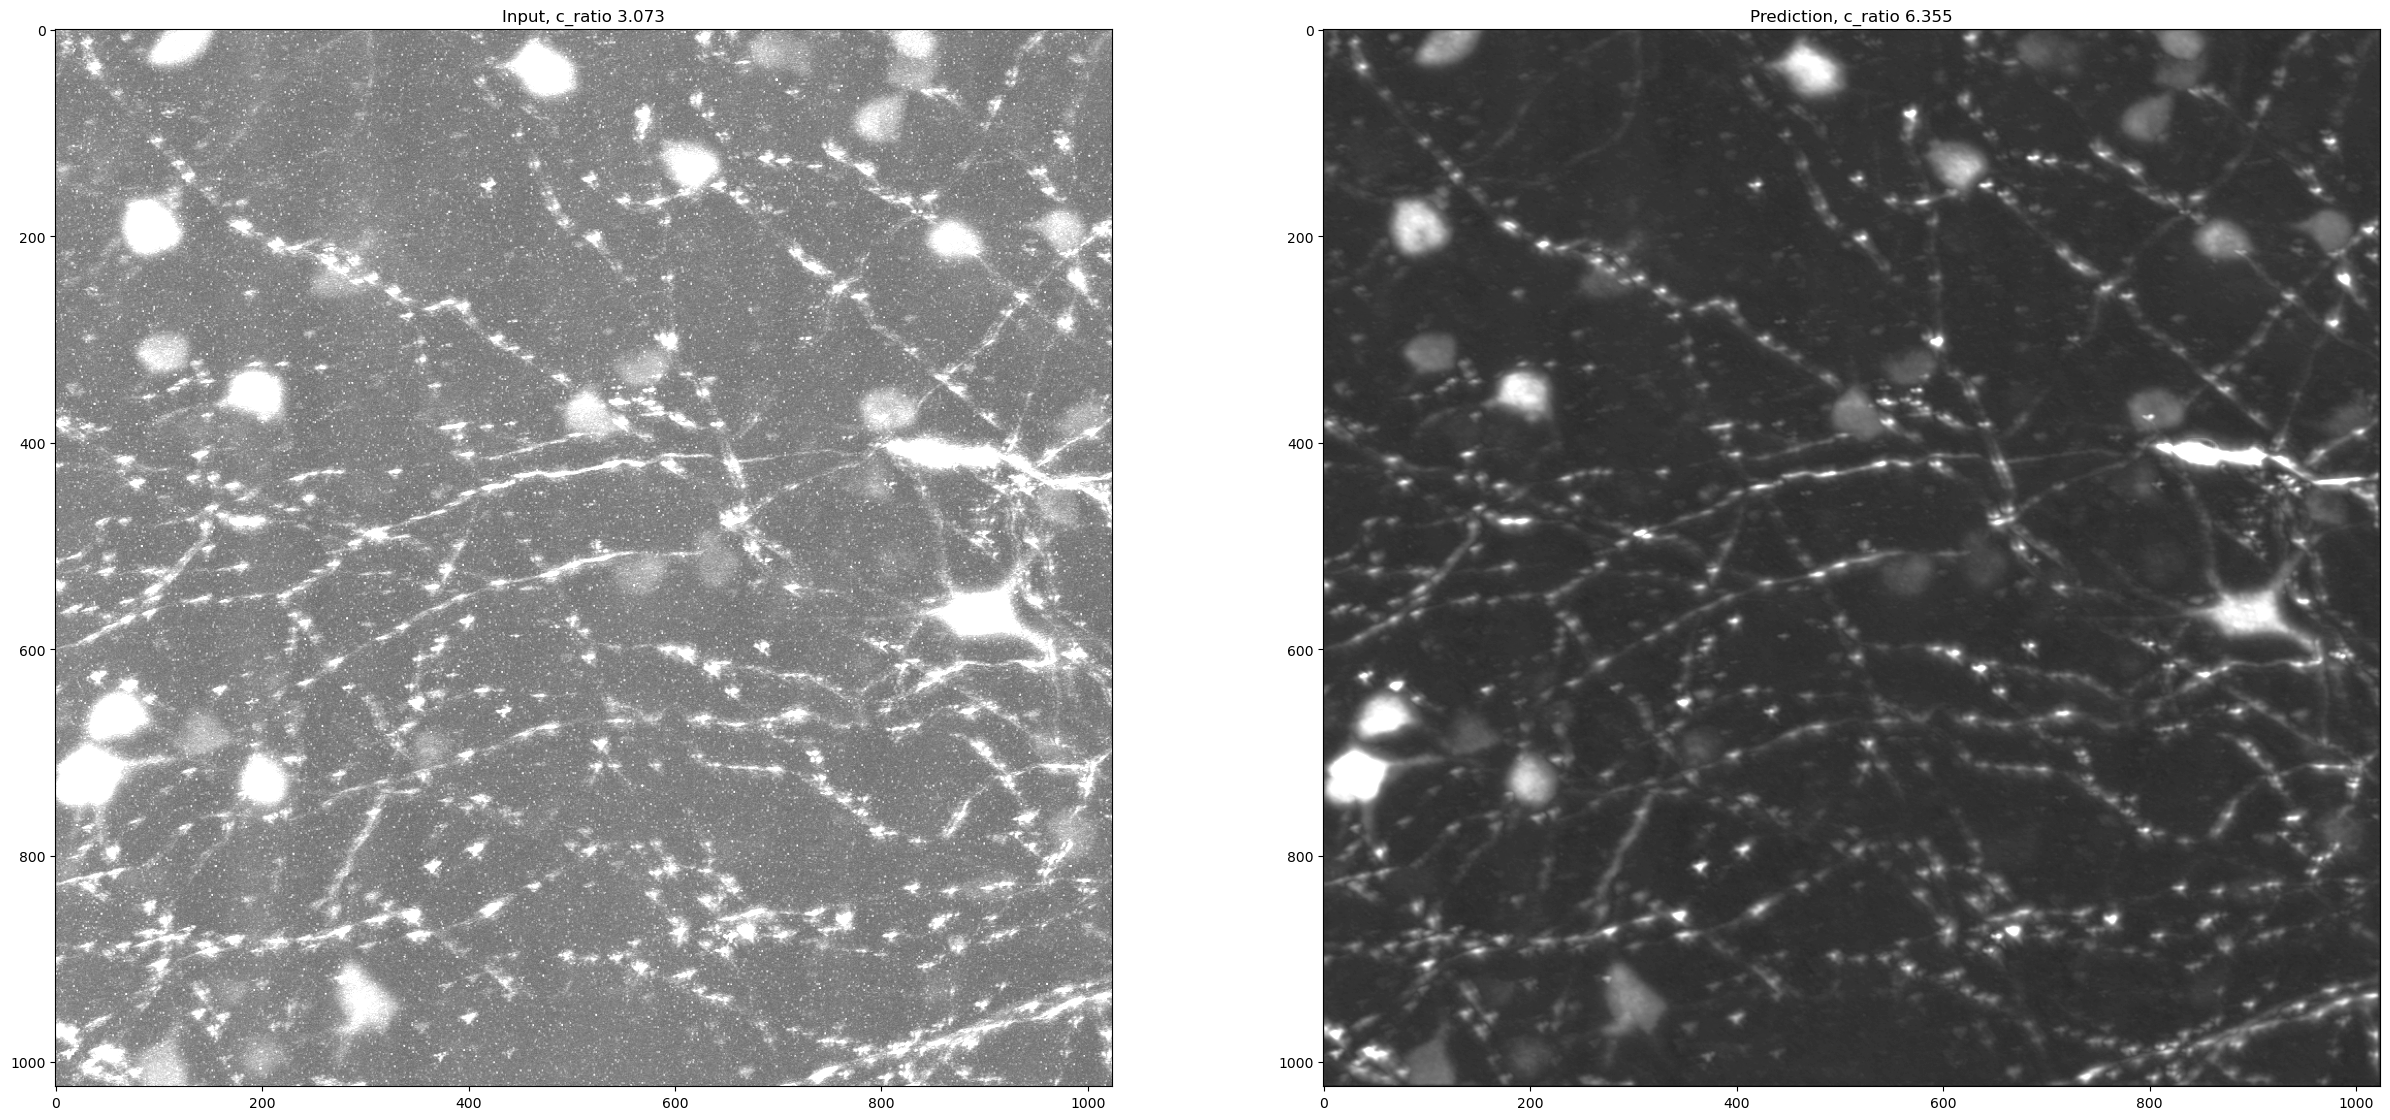

In [9]:
# Let's look at the results.
plt.figure(figsize=(30,30))

# We show the noisy input...
plt.subplot(1,2,1)
plt.imshow(np.max(img,axis=0),
           cmap='gray',
           vmin=0,
           vmax=100
          )
plt.title(f'Input, c_ratio {in_zarr.nbytes / in_zarr.nbytes_stored:.3f}');

# and the result.
plt.subplot(1,2,2)
plt.imshow(np.max(rescaled,axis=0), 
           cmap='gray',
           vmin=0,
           vmax=100
          )
plt.title(f'Prediction, c_ratio {out_zarr_denoised.nbytes / out_zarr_denoised.nbytes_stored:.3f}');

## Save results